## Getting data from a Database ingestion example from DataCamp exercises

From the 'Streamlined Data Ingestion with pandas' course found [here](https://learn.datacamp.com/courses/streamlined-data-ingestion-with-pandas)

In [1]:
# Import dependencies
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

In [2]:
# Create database engine to manage connections
engine = create_engine("sqlite:///data/data.db")

In [3]:
# View the tables in the database
print(engine.table_names())

['boro_census', 'hpd311calls', 'weather']


In [4]:
# Load entire weather table by table name
weather = pd.read_sql("weather", engine)

In [5]:
# Alternative way to import the entire weather table using SQL
weather_SQL = pd.read_sql("SELECT * FROM weather", engine)

In [6]:
print(weather.equals(weather_SQL))

True


In [7]:
weather.head()

,station,name,latitude,longitude,elevation,date,month,awnd,prcp,snow,tavg,tmax,tmin
0,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,12/01/2017,December,5.37,0.00,0.0,,52,42
1,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,12/02/2017,December,3.13,0.00,0.0,,48,39
2,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,12/03/2017,December,2.01,0.00,0.0,,48,42
3,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,12/04/2017,December,3.58,0.00,0.0,,51,40
4,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,12/05/2017,December,6.71,0.75,0.0,,61,50


In [8]:
# Create a SQL query to load the entire hpd311calls table
query = """SELECT * FROM hpd311calls;"""

In [9]:
# Load hpd311calls table using variable SQL query
hpd311calls = pd.read_sql(query, engine)

In [10]:
# View the first few rows of hpd311calls data
hpd311calls.head()

,unique_key,created_date,agency,complaint_type,incident_zip,incident_address,community_board,borough
0,38070822,01/01/2018,HPD,HEAT/HOT WATER,10468,2786 JEROME AVENUE,07 BRONX,BRONX
1,38065299,01/01/2018,HPD,PLUMBING,10003,323 EAST 12 STREET,03 MANHATTAN,MANHATTAN
2,38066653,01/01/2018,HPD,HEAT/HOT WATER,10452,1235 GRAND CONCOURSE,04 BRONX,BRONX
3,38070264,01/01/2018,HPD,HEAT/HOT WATER,10032,656 WEST 171 STREET,12 MANHATTAN,MANHATTAN
4,38072466,01/01/2018,HPD,HEAT/HOT WATER,11213,1030 PARK PLACE,08 BROOKLYN,BROOKLYN


### Create more complicated query

In [11]:
# Write query in triple quotes to split line and query records only from Brooklyn
query = """SELECT *
            FROM hpd311calls
            WHERE borough = 'BROOKLYN';"""

In [12]:
# Query the database
brooklyn_calls = pd.read_sql(query, engine)

In [13]:
# Print the results
print(brooklyn_calls.borough.unique())

['BROOKLYN']


### Combining Conditions: AND

In [14]:
# Write query to get records about plumbing in the Bronx
and_query = """SELECT *
                FROM hpd311calls
                WHERE borough = 'BRONX'
                AND complaint_type = 'PLUMBING';"""

In [15]:
# Get calls about plumbing issues in the Bronx
bx_plumbing_calls = pd.read_sql(and_query, engine)

In [16]:
# Check record count
bx_plumbing_calls.shape

(2016, 8)

### Combining Conditions: OR

In [17]:
# Write query to get records about water leaks OR plumbing
or_query = """SELECT *
            FROM hpd311calls
            WHERE complaint_type = 'WATER LEAK'
            OR complaint_type = 'PLUMBING';"""

In [18]:
# Get calls that are about plumbing or water leaks
leaks_or_plumbing = pd.read_sql(or_query, engine)

In [19]:
# Check record count
leaks_or_plumbing.shape

(10684, 8)

<AxesSubplot:ylabel='borough'>

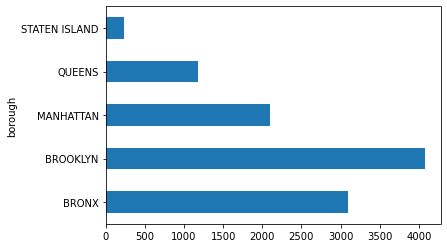

In [20]:
# Graph the number of records
call_counts = leaks_or_plumbing.groupby('borough').unique_key.count()
call_counts.plot.barh()

## Get DISTINCT Values

Unique values can be returned for one or more columns with `SELECT DISTINCT`

In [21]:
# Write query to get distinc street addresses and boroughs
distinct_query = """SELECT DISTINCT incident_address,
                    borough
                    FROM hpd311calls;"""

In [22]:
# Get records
unique_addresses = pd.read_sql(distinct_query, engine)

In [23]:
# Check record count
print(unique_addresses.shape)

(20140, 2)


## Aggregate functions

`SUM`, `AVG`, `MAX`, `MIN`
* Each takes a single column name

In [24]:
avg_query = """SELECT AVG(tmax)
                FROM weather;"""

`COUNT`
* Get number of rows that meet query conditions

In [25]:
count_query = """SELECT complaint_type,
                COUNT(*)
                FROM hpd311calls;"""

* Get number of unique values in a column

In [26]:
unique_vals_query = """SELECT COUNT(DISTINCT incident_address, borough
                        FROM  hpd311calls;)"""

In [27]:
# Create a query to get month and max tmax by month
tmax_query = """
SELECT month, 
       MAX(tmax)
  FROM weather 
  GROUP BY month;"""

In [28]:
# Get data frame of monthly weather stats
weather_by_month = pd.read_sql(tmax_query, engine)

In [29]:
# View weather stats by month
print(weather_by_month)

      month  MAX(tmax)
0  December         61
1  February         78
2   January         61
3     March         62


In [30]:
# Create a query to get month, max tmax, and min tmin by month
max_min_query = """
SELECT month, 
	   MAX(tmax), 
       MIN(tmin)
  FROM weather 
 GROUP BY month;
"""

In [31]:
# Get data frame of monthly weather stats
weather_by_month = pd.read_sql(max_min_query, engine)

In [32]:
# View weather stats by month
print(weather_by_month)

      month  MAX(tmax)  MIN(tmin)
0  December         61          9
1  February         78         16
2   January         61          5
3     March         62         27


In [33]:
# Create query to get temperature and precipitation by month
max_temp_query = """
SELECT month, 
        MAX(tmax), 
        MIN(tmin),
        SUM(prcp)
  FROM weather 
 GROUP BY month;
"""

In [34]:
# Get data frame of monthly weather stats
weather_by_month = pd.read_sql(max_temp_query, engine)

In [35]:
# View weather stats by month
print(weather_by_month)

      month  MAX(tmax)  MIN(tmin)  SUM(prcp)
0  December         61          9       2.21
1  February         78         16       5.83
2   January         61          5       2.18
3     March         62         27       5.17


## GROUP BY

* Aggregate functions calculate a single summary statistic by default
* Summarize data by categories with `GROUP BY` statements
* Remember to also select the column you're grouping by!

In [36]:
# Get counts of plumbing calls by borough
borough_count_query = """SELECT borough, 
                        COUNT(*)
                        FROM hpd311calls
                        WHERE complaint_type = 'PLUMBING'
                        GROUP BY borough;"""

In [37]:
# Query database and create data frame
plumbing_call_counts = pd.read_sql(borough_count_query, engine)

In [38]:
plumbing_call_counts.head()

,borough,COUNT(*)
0,BRONX,2016
1,BROOKLYN,2702
2,MANHATTAN,1413
3,QUEENS,808
4,STATEN ISLAND,178


<AxesSubplot:ylabel='borough'>

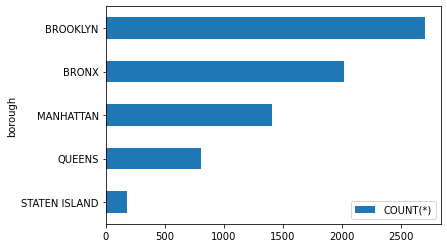

In [39]:
# Graph out the results
plumbing_call_counts.set_index('borough').sort_values(by='COUNT(*)').plot.barh()

In [40]:
# Create query to get call counts by complaint_type
complaint_query = """
SELECT complaint_type, 
     COUNT(*)
  FROM hpd311calls
  GROUP BY complaint_type;
"""

In [41]:
# Create data frame of call counts by issue
calls_by_issue = pd.read_sql(complaint_query, engine)

<AxesSubplot:ylabel='complaint_type'>

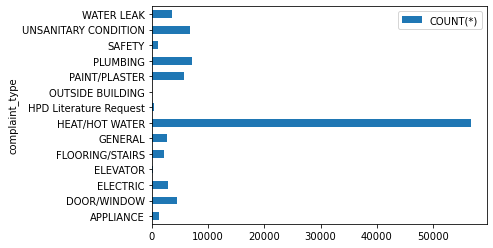

In [42]:
# Graph the number of calls for each housing issue
calls_by_issue.plot.barh(x="complaint_type")

## Joining Tables

* Use dot notation(table.column) when working with multiple tables
* Default join only returns records whose key values appear in both tables
* Make sure join keys are the same dta type or nothing will match

In [43]:
# Query to get hpd311calls and precipitation values
join_query = """
SELECT hpd311calls.*, weather.prcp
  FROM hpd311calls
  JOIN weather
    ON hpd311calls.created_date = weather.date
  WHERE hpd311calls.complaint_type = 'WATER LEAK';"""

In [44]:
# Create data frame of call data that has matching weather data on that date
first_join = pd.read_sql(join_query, engine)

In [45]:
first_join.head()

,unique_key,created_date,agency,complaint_type,incident_zip,incident_address,community_board,borough,prcp
0,38074305,01/01/2018,HPD,WATER LEAK,11212,1026 WILLMOHR STREET,17 BROOKLYN,BROOKLYN,0.0
1,38078748,01/01/2018,HPD,WATER LEAK,10458,2700 MARION AVENUE,07 BRONX,BRONX,0.0
2,38081097,01/01/2018,HPD,WATER LEAK,11221,192 MALCOLM X BOULEVARD,03 BROOKLYN,BROOKLYN,0.0
3,38077874,01/01/2018,HPD,WATER LEAK,11418,129-11 JAMAICA AVENUE,09 QUEENS,QUEENS,0.0
4,38081110,01/01/2018,HPD,WATER LEAK,11420,111-17 133 STREET,10 QUEENS,QUEENS,0.0


### Joining and Filtering

In [46]:
# Get only heat/hot water calls and join in the weather data for that day
calls_weather_query = """SELECT *
                        FROM hpd311calls
                        JOIN weather
                        ON hpd311calls.created_date = weather.date
                        WHERE hpd311calls.complaint_type = 'HEAT/HOT WATER';"""

In [47]:
# Get borough call counts along with borough population and housing unit counts
borough_query = """SELECT hpd311calls.borough,
                    COUNT(*),
                    boro_census.total_population,
                    boro_census.housing_units
                    FROM hpd311calls
                    JOIN boro_census
                    ON hpd311calls.borough = boro_census.borough
                    GROUP BY hpd311calls.borough;"""

In [48]:
call_counts = pd.read_sql(borough_query, engine)

In [49]:
call_counts

,borough,COUNT(*),total_population,housing_units
0,BRONX,29874,1455846,524488
1,BROOKLYN,31722,2635121,1028383
2,MANHATTAN,20196,1653877,872645
3,QUEENS,11384,2339280,850422
4,STATEN ISLAND,1322,475948,179179


### Joining, filtering and aggregating

We will investigate how the number of heating complaints in New York City's 311 line varies with temperature

In [50]:
# Modify query to join tmax and tmin from weather by date
heat_query = """
SELECT hpd311calls.created_date, 
	   COUNT(*), 
       weather.tmax,
       weather.tmin
  FROM hpd311calls 
       JOIN weather
       ON hpd311calls.created_date = weather.date
 WHERE hpd311calls.complaint_type = 'HEAT/HOT WATER' 
 GROUP BY hpd311calls.created_date;
 """

In [51]:
heat_counts = pd.read_sql(heat_query, engine)

In [52]:
heat_counts.head()

,created_date,COUNT(*),tmax,tmin
0,01/01/2018,4597,19,7
1,01/02/2018,4362,26,13
2,01/03/2018,3045,30,16
3,01/04/2018,3374,29,19
4,01/05/2018,4333,19,9


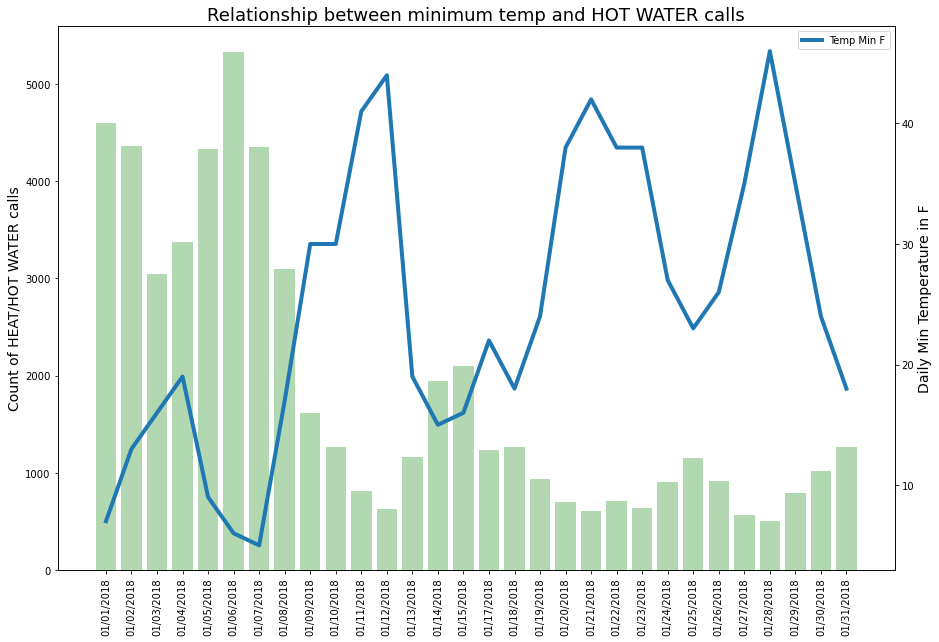

In [53]:
# Plot the relationship between minimum temperature and the number of HEAT/HOT WATER calls
fig, ax = plt.subplots(figsize=(15,10))
ax.bar(heat_counts['created_date'], heat_counts['COUNT(*)'], label='Count', color='green', alpha=0.3)
ax.set_ylabel('Count of HEAT/HOT WATER calls', fontsize=14)
plt.xticks(rotation=90)
ax2 = ax.twinx()
ax2.plot(heat_counts['created_date'], heat_counts['tmin'], label='Temp Min F', linewidth=4)
ax2.set_ylabel('Daily Min Temperature in F', fontsize=14)
plt.title('Relationship between minimum temp and HOT WATER calls', fontsize=18)
plt.legend()
plt.show()

It is pretty clear from the graph that when the temperature drops below 20 degrees Fahrenheit the number of calls for HOT WATER increases dramtically

## Combining multiple datasets

### Merging
* Use case: combining datasets to add related columns
* Datasets have key columns() with common values
* `merge()`: `pandas` version of SQL join statement
    * Both a `pandas` function and a data frame method
* `df.merge()` arguments:
    * Second data frame to merge
    * Columns to merge on
        * `on` if names are the same in both data frames
        * `left_on` and `right_on` if key names differ
        * Key columns should be the same data type

In [56]:
# Get all call counts
call_query = """SELECT created_date,
                COUNT(*)
                FROM hpd311calls;"""

In [57]:
call_counts = pd.read_sql(call_query, engine)

In [58]:
call_counts.head()

,created_date,COUNT(*)
0,01/01/2018,94889


In [54]:
# Merge weather into call counts date columns
merged = call_counts.merge(weather,
                          left_on='created_date',
                          right_on='date')

KeyError: 'created_date'